# The Masters Thesis Implementation

# Introduction

We implement the proposed model to classify the image texture dataset. We refer the code from:
 1. https://keras.io/examples/vision/semisupervised_simclr/
 2. Code from James McDermott's lecture in CT5133 Deep learning of NUIG

# Environment configuration

We use dill package to save and store the Jupyter-Notebook session, since when we close the Anaconda and re-open the notebook we do not need to re-execute each cells.

## Saving the Jupyter-Notebook session

In [197]:
import os
import dill

if not os.path.exists("sessions"): 
    os.makedirs("sessions")

#dill.dump_session('sessions/project.ipynb-session')

## Restoring the Jupyter-Notebook session

In [2]:
import os
import dill

dill.load_session('sessions/project.ipynb-session')

## Verifying if the last session is loaded

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

def verify_saved_session():
    X, y = load_mbt_dataset()

    print(X.shape)
    img = X[0, :, :, :]
    img = np.array(img, dtype = np.uint8)
    plt.imshow(img)
    plt.show()
    plt.close()

Loading dataset from mbt ...
image size:  (512, 512)
(154, 512, 512, 3)


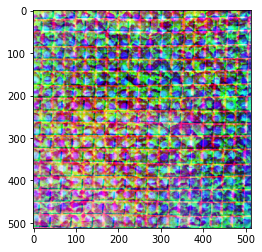

In [35]:
verify_saved_session()

## Checking the versions of Python, Keras and Tensorflow

In [1]:
import sys
import os

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed
    
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0' 

import tensorflow as tf
from tensorflow import keras

print("Python version: ", sys.version)
print("keras version: ", keras.__version__)
print("tf version: ", tf.__version__)

Python version:  3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]
keras version:  2.5.0
tf version:  2.5.0


## Plotting matplotlib figures inline

In [2]:
%matplotlib inline

# Global configuration

In [4]:
DENSE_DIMS = (200, 50,)

# The dropout probability
DENSE_DROPOUT = 0.1

# How many epochs we use for training
N_TRAIN_EPOCHS = 20

#image size is resized to
DATASET_IMAGE_SIZE = (512, 512)

IMAGE_SIZE = (256, 512)

#we split an image into halves as training and testing
SPLIT_RATIO = 0.5

N_IMAGE_CHANNELS = 3

BATCH_SIZE = 16

# for resnet, the input size should be larger than 32x32
# model input is 64x64
INPUT_SHAPE = (64, 64, N_IMAGE_CHANNELS)

# Output size for latent space
OUTPUT_DIM = 10

## Loading dataset

In [5]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import os
import pandas as pd

def load_mbt_dataset(image_size = DATASET_IMAGE_SIZE):
    
    dataset_path = "mbt"
    
    print()
    print(f"Loading dataset from path: {dataset_path} ...")
    print("image size: ", image_size)
    
    X = [] 
    y = []
    

    # Get the subdirs for given dataset path

    files = []
    
    suffixes = (".tif", ".gif", ".png", ".jpg")
    
    imgfiles = [d.path for d in os.scandir(dataset_path) 
                    if d.is_file(follow_symlinks = False) and 
                        not d.name.startswith(".") and
                        d.name.lower().endswith(suffixes) ]
    
    #print(imgfiles)
    
    for p in sorted(imgfiles):
        #print(p)

        
        # Loading images and pre-processing images
        img = load_img( path = p,
                        grayscale = False, 
                        color_mode='rgb', 
                        target_size = image_size)
        
        # Converting images into numpy arraries.
        img = img_to_array(
                        img = img,
                        data_format = "channels_last",
                        dtype = np.double)
        
                        
        filename, file_extension = os.path.splitext(p)
        
        X.append(img)
        y.append(os.path.basename(filename))
        
    print(f"Total {len(y)} images are loaded.")    
    #print()
    
    X = np.array(X)
    y = np.array(y)
    X = X.astype('float32')
    X /= 255.0
    #X -= 0.5
    
    return X, y 


def load_mbt_dataset_as_dataframe():
    X, y = load_mbt_dataset()
    
    data = {"X": list(X),
            "y": list(y)}
    
    df = pd.DataFrame(data) 
    
    return df  

In [6]:
def save_mbt_as_numpy():
    X, y = load_mbt_dataset()
    
    np.save("mbt_X.npy", X)
    np.save("mbt_y.npy", y)
        

In [68]:
#save_mbt_as_numpy()

In [8]:
def test_load_mbt_dataset():
    X,y = load_mbt_dataset()
    print()
    print("num_of_samples: ", len(y))
    print("shape: ", X.shape)

In [9]:
test_load_mbt_dataset()


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.

num_of_samples:  154
shape:  (154, 512, 512, 3)


In [10]:
def test_load_mbt_dataset_as_dataframe():
    df = load_mbt_dataset_as_dataframe()
    print()
    print("num_of_samples: ", len(df))

In [11]:
test_load_mbt_dataset_as_dataframe()


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.

num_of_samples:  154


## Visualising dataset

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

""" We plot the sample images from the dataset. 
"""

def plot_dataset_samples(df, nrows = 4, ncols = 4, subfig_height = 4, subfig_width = 4):
    
    
    
    
    """ Plotting the samples 
    
    """

    figsize = (ncols * subfig_width, nrows * subfig_height) 
    #figsize = (15, 15) 

    

    """ Sampling
    
    """
    dfs = df.sample(n = nrows * ncols, replace = False)
    
    Xs = np.array(dfs["X"], dtype = object)
    ys = np.array(dfs["y"], dtype = object)
    
    
    fig, axes = plt.subplots(nrows = nrows,
                             ncols = ncols,
                             figsize = figsize)
    
    """ plt.subplots_adjust(left = 0.02,
                    right = 0.97,
                    bottom = 0.05,
                    hspace = 0.1,
                    wspace = 0.1,
                    top = 0.95)
    """

    axes_flat = axes.flat
    
    
    for row in range(nrows):
        for col in range(ncols):
            
            imgid = row * ncols + col
            
            img = Xs[imgid]
            #img = np.array(img, dtype = np.uint8) #print("img.shape", img.shape)
            
            label = ys[imgid]
            
            ax = axes_flat[row * ncols + col] 
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(img, vmin = 0, vmax = 1) 
            ax.title.set_text(f"{label} #{imgid}")

    plt.show()
    plt.close()


In [13]:
def plot_mbt_orig_dataset():
    # Loading dataset
    df = load_mbt_dataset_as_dataframe()
    
    plot_dataset_samples(df, nrows = 2, ncols = 4)


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.


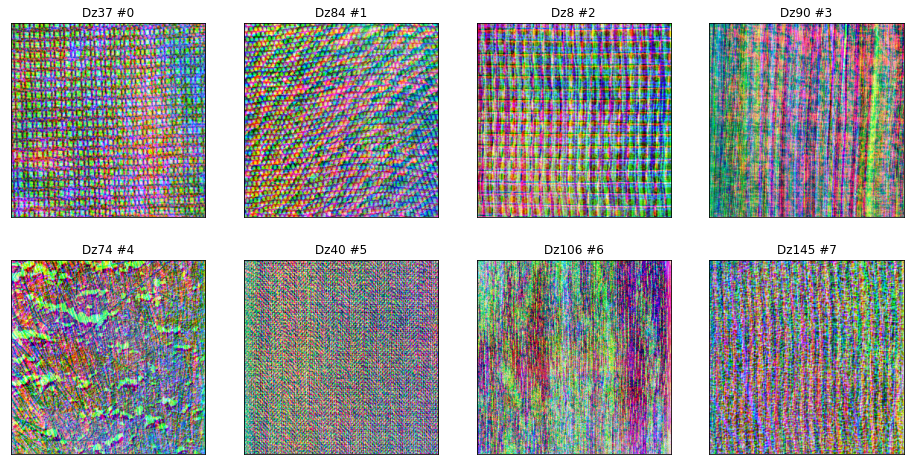

In [14]:
plot_mbt_orig_dataset()

## Splitting the dataset for training and testing

In [15]:
def split_mbt_dataset(X, y, split = SPLIT_RATIO):
    X_train = []
    y_train = []
    
    X_test = []
    y_test = []
    
    
    for Xi, yi in zip(X, y):
        Xi = np.array(Xi)
        #print(Xi.shape)
        #print(yi)
        
        height = Xi.shape[0]
        
        position = int(split * height)

        Xi_train = Xi[0:position, :, :]
        Xi_test = Xi[position:height, :, :]
        
        #print(Xi_train.shape)
        #print(Xi_test.shape)
        
        yi_train = yi
        yi_test = yi
        
        X_train.append(Xi_train)
        y_train.append(yi_train)
        
        X_test.append(Xi_test)
        y_test.append(yi_test)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    print()
    print("Splitting dataset into training and testing dataset ...")
    print(f"size of training dataset : {len(y_train)}")
    print(f"size of testing dataset : {len(y_test)}")
    print(f"training dataset shape: {X_train.shape}")
    print(f"testing dataset shape: {X_test.shape}")
    #print()
    
    return X_train, y_train, X_test, y_test

In [16]:
def split_mbt_dataset_as_dataframe(X, y, split = SPLIT_RATIO):
    
    X_train, y_train, X_test, y_test = split_mbt_dataset(X, y, split)
    
    data_train = {"X": list(X_train),
                  "y": list(y_train)}
    
    data_test = {"X": list(X_test),
                  "y": list(y_test)}
    
    df_train = pd.DataFrame(data_train) 

    df_test = pd.DataFrame(data_test) 

    #print("X_train.shape = ", np.array(X_train).shape)
    
    return df_train, df_test


In [17]:
def test_split_mbt_dataset():
    X,y = load_mbt_dataset()
    df_train, df_test = split_mbt_dataset_as_dataframe(X, y, split = SPLIT_RATIO)

In [18]:
test_split_mbt_dataset()


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.

Splitting dataset into training and testing dataset ...
size of training dataset : 154
size of testing dataset : 154
training dataset shape: (154, 256, 512, 3)
testing dataset shape: (154, 256, 512, 3)


## Visualising training dataset samples

In [19]:
def plot_train_dataset_samples():
    X,y = load_mbt_dataset()
    df_train, df_test = split_mbt_dataset_as_dataframe(X, y, split = 0.5)
    plot_dataset_samples(df_train, nrows = 2, ncols = 4, subfig_height = 2.5)


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.

Splitting dataset into training and testing dataset ...
size of training dataset : 154
size of testing dataset : 154
training dataset shape: (154, 256, 512, 3)
testing dataset shape: (154, 256, 512, 3)


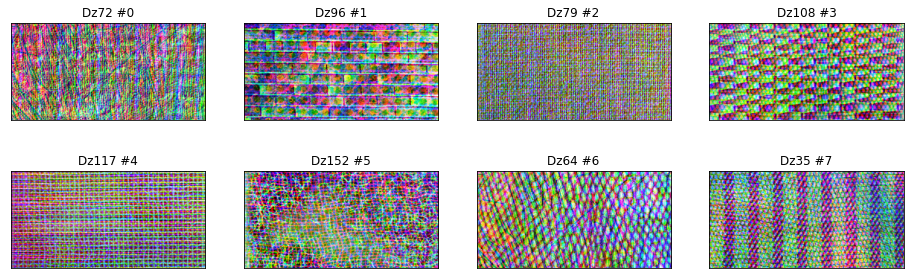

In [20]:
plot_train_dataset_samples()

## Visualising testing dataset samples

In [21]:
def plot_test_dataset_samples():
    X,y = load_mbt_dataset()
    df_train, df_test = split_mbt_dataset_as_dataframe(X, y, split = 0.5)
    plot_dataset_samples(df_test, nrows = 2, ncols = 4, subfig_height = 2.5)


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.

Splitting dataset into training and testing dataset ...
size of training dataset : 154
size of testing dataset : 154
training dataset shape: (154, 256, 512, 3)
testing dataset shape: (154, 256, 512, 3)


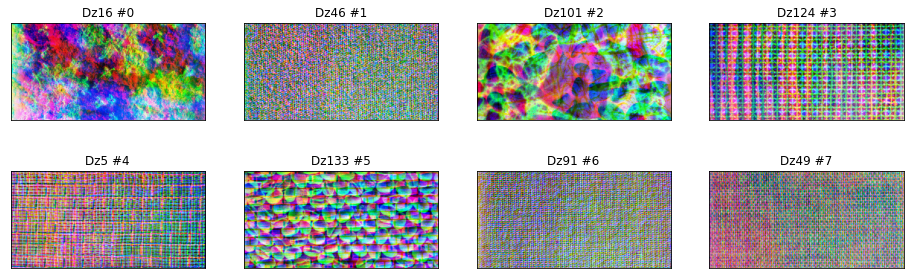

In [22]:
plot_test_dataset_samples()

# Constructing base encoder

In [69]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

import sys
import os
import pickle

def construct_base_encoder(*, 
                           trainable = False,
                           input_size, 
                           output_layer_name):
    
    print()
    print("Building base encoder ...")
    print(f"input_size = {input_size}")
    print(f"output_layer_name = {output_layer_name}")
    print(f"trainable = {trainable}")
    
    inputs = keras.Input(shape = input_size, name = "inputs")

    
    orig_model = ResNet50(
                                include_top = False,      # no pre-defined head
                                input_tensor = inputs,    # input tensor
                                input_shape = input_size, # input shape
                                weights = "imagenet",     # from ImageNet
                                pooling = "max"           #max avg
                                )

    
    orig_model.trainable = trainable
    
    #orig_model.summary()
    
    #for layer in orig_model.layers: 
    #    layer.trainable = False
    
    
    
    
    #print("output_layer_name = ", output_layer_name)
    
    #x = preprocess_input(inputs)
    
    # Chopping specified layers
    outputs = orig_model.get_layer(output_layer_name).output
   
    new_model = keras.Model(inputs = inputs, outputs = outputs, name = "base-encoder")

    output_size = new_model.layers[-1].output.shape[1:]
    
    print(f"output_size = {output_size}")
    
    
    orig_num_of_layers = len(orig_model.layers)
    print(f"orig_num_of_layers = {orig_num_of_layers}")
    
    new_num_of_layers = len(new_model.layers)
    print(f"new_num_of_layers = {new_num_of_layers} "
          f"({new_num_of_layers/orig_num_of_layers: .2f})")
    
    
    #model.summary()
    
    return new_model
    

In [70]:
def test_construct_base_encoder():
    #print("INPUT_SHAPE: ", INPUT_SHAPE)
    base_encoder = construct_base_encoder(
                                      trainable = False,
                                      input_size = INPUT_SHAPE, 
                                      output_layer_name = "conv3_block4_out")

    #print("base_encoder_num_of_layers = ", len(base_encoder.layers))
    #print("base_encoder_outputs_dim = ", base_encoder.layers[-1].output.shape.as_list()[1:])

    #base_encoder.summary()

In [28]:
test_construct_base_encoder()


Building base encoder ...
input_size = (64, 64, 3)
output_layer_name = conv3_block4_out
trainable = False
output_size = (8, 8, 512)
orig_num_of_layers = 176
new_num_of_layers = 81 ( 0.46)


# Simple base encoder

In [103]:
def construct_base_encoder_2(*, img_size, embedding_dim):
    """A small convolutional model. Its input is an image and output is an
    embedding, ie a vector. We don't compile or add a loss since this
    model will become a component in the complete model below."""
    model = keras.Sequential()
    #model.add(keras.Input(shape = img_size))
    model.add(keras.layers.Convolution2D(32, (3, 3), activation='relu',
                            input_shape=img_size))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Convolution2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Convolution2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.GlobalMaxPooling2D())
    model.add(keras.layers.Dropout(0.1))
    # model.add(Flatten())
    model.add(keras.layers.Dense(32, activation='relu'))
    # tanh => output is in [-1, 1]^embedding_dim
    model.add(keras.layers.Dense(embedding_dim, activation='tanh'))
    return model


In [104]:
def test_construct_base_encoder_2():
    
    img_size = (64, 64, 3)
    
    model = construct_base_encoder_2(img_size = img_size, embedding_dim = 10)
    
    model.summary()
    
    X = np.expand_dims(np.random.rand(*img_size), axis = 0)
    
    y = model.predict(X)
    
    print(y)

In [102]:
test_construct_base_encoder_2()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
global_max_pooling2d_11 (Glo (None, 32)                0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)              

# Constructing projection head

In [73]:
def construct_projhead_model(*, input_size, output_size, batch_size = 1, beta = 0.005):

    input_size = input_size.copy()
    
    print()
    print("Building projection head ...")
    print(f"input_size = {input_size}")
    print(f"output_size = {output_size}")
    print(f"batch_size = {batch_size}")
    print(f"beta = {beta}")
    
    if len(input_size) == 1:
        input_size = input_size[0]
    
    inputs = keras.Input(shape = input_size, name = "projhead_inputs")

    #if global_pooling:
    #    x = keras.layers.GlobalAveragePooling2D()(x)
        
    #x = keras.layers.GlobalAveragePooling2D()(inputs) 
    x = keras.layers.GlobalMaxPooling2D()(inputs) 
    
    """if len(input_size) > 1:
        # Adding a Conv2D layer with kernel size 1
        x = keras.layers.Conv2D(1, 1)(inputs)
        x = keras.layers.Flatten(name = "projhead_flatten")(x) 
    else:
        x = keras.layers.Flatten(name = "projhead_flatten")(inputs)    
    """
    
    x = keras.layers.Flatten(name = "projhead_flatten")(x) 
    
    x = keras.layers.BatchNormalization()(x)
    
    x = keras.layers.Dropout(0.1)(x)
    
    for idx, dim in enumerate(DENSE_DIMS):
           # We do not use BN since we found the
                                                    # performance improvement is limited.
        x = keras.layers.Dense(
                               dim, 
                               activation = "relu",  # swish
                               #kernel_regularizer = keras.regularizers.l1(beta),
                               name = f"projhead_dense_{idx+1}"
                              )(x)
        #x = keras.layers.Dropout(DENSE_DROPOUT, name = f"projhead_dropout_{idx+1}")(x)
    
    outputs = keras.layers.Dense(output_size, 
                                 activation = 'tanh', 
                                 #kernel_regularizer = keras.regularizers.l1(beta),
                                 name = "projhead_output")(x)
    
    
    model = keras.Model(inputs = inputs, outputs = outputs, name = "projhead")

    #model.summary()

    return model

In [74]:
def test_construct_projhead_model():
    base_encoder = construct_base_encoder(input_size = INPUT_SHAPE, 
                                      output_layer_name = "conv3_block4_out")
                                      
    
    base_encoder_outputs_dim = base_encoder.layers[-1].output.shape.as_list()[1:]

    print()
    print("base_encoder_outputs_dim=", base_encoder_outputs_dim)
    
    projhead = construct_projhead_model(input_size = base_encoder_outputs_dim,
                                    output_size = OUTPUT_DIM)
                                    
       
    print()
    projhead.summary()

In [62]:
test_construct_projhead_model()


Building base encoder ...
input_size = (64, 64, 3)
output_layer_name = conv3_block4_out
trainable = False
output_size = (8, 8, 512)
orig_num_of_layers = 176
new_num_of_layers = 81 ( 0.46)

base_encoder_outputs_dim= [8, 8, 512]

Building projection head ...
input_size = [8, 8, 512]
output_size = 10
batch_size = 1
beta = 0.005

Model: "projhead"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
projhead_inputs (InputLayer) [(None, 8, 8, 512)]       0         
_________________________________________________________________
global_max_pooling2d_7 (Glob (None, 512)               0         
_________________________________________________________________
projhead_flatten (Flatten)   (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
___________________________________________________________

# Constructing augmentation model

In [75]:
def construct_augmentation_model(*, 
                                 input_size = (*IMAGE_SIZE, N_IMAGE_CHANNELS), 
                                 output_size = INPUT_SHAPE,
                                 rand_seed = 21):
    
    
    print()
    print("Building augmentation model ...")
    print(f"input_size = {input_size}")
    print(f"output_size = {output_size}")
    
    """
    inputs = keras.Input(shape = input_size)
    
    #x = keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
    x = keras.layers.experimental.preprocessing.Normalization()(inputs)
    
    #x = keras.layers.experimental.preprocessing.RandomFlip()(x)

    #x = keras.layers.experimental.preprocessing.RandomZoom(0.5)(x)

    x = keras.layers.experimental.preprocessing.RandomRotation(0.5)(x)
    
    #x = keras.layers.experimental.preprocessing.RandomContrast(0.5)(x)
    
    #print("input_size = ", input_size)
    #print("output_size = ", output_size)
    
    outputs = keras.layers.experimental.preprocessing.RandomCrop(output_size[0], output_size[1])(x)
      
    
    model = keras.Model(inputs = inputs, outputs = outputs, name = "image_augmenter")
    """
    
    model = keras.Sequential([
              keras.Input(shape = input_size),
              #keras.layers.experimental.preprocessing.Rescaling(1.0 / 255),
              #keras.layers.experimental.preprocessing.Normalization(),
              keras.layers.experimental.preprocessing.RandomFlip(seed = rand_seed),
              #keras.layers.experimental.preprocessing.RandomZoom(0.5),
              keras.layers.experimental.preprocessing.RandomRotation(0.5, seed = rand_seed),
              keras.layers.experimental.preprocessing.RandomCrop(output_size[0], 
                                                                 output_size[1],
                                                                 seed = rand_seed)
        
             ])
    
    
    return model

In [76]:

def plot_augmented_samples(nrows = 2, ncols = 4, subfig_width = 4, subfig_height = 4):
    
    X,y = load_mbt_dataset()
    
    X_train, y_train, X_test, y_test = split_mbt_dataset(X, y)
    
    img_augmenter = construct_augmentation_model()
    
    
    figsize = (ncols * subfig_width, nrows * subfig_height) 
    
    fig, axes = plt.subplots(nrows = nrows,
                             ncols = ncols,
                             figsize = figsize)
    
    """ plt.subplots_adjust(left = 0.02,
                    right = 0.97,
                    bottom = 0.05,
                    hspace = 0.1,
                    wspace = 0.1,
                    top = 0.95)
    """

    axes_flat = axes.flat
    
    
    for row in range(nrows):
        for col in range(ncols):
            
            imgid = row * ncols + col
            
            Xi = X_train[imgid, :, :, :]
            #Xi = X_train[3, :, :, :]
            Xi = Xi.copy()
            Xi = np.expand_dims(Xi, axis = 0)
            Xi = img_augmenter(Xi)
            #Xi = np.array(Xi, dtype = np.uint8)
            img = Xi[0, :, :, :]
    
            #img = X_train[imgid, :, :, :]
            #img = np.array(img, dtype = np.uint8) #print("img.shape", img.shape)
            
            label = y_train[imgid]
            
            ax = axes_flat[row * ncols + col] 
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(img, vmin = 0, vmax = 1.0) 
            ax.title.set_text(f"{label} #{imgid}")

    plt.show()
    plt.close()


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.

Splitting dataset into training and testing dataset ...
size of training dataset : 154
size of testing dataset : 154
training dataset shape: (154, 256, 512, 3)
testing dataset shape: (154, 256, 512, 3)

Building augmentation model ...
input_size = (256, 512, 3)
output_size = (64, 64, 3)


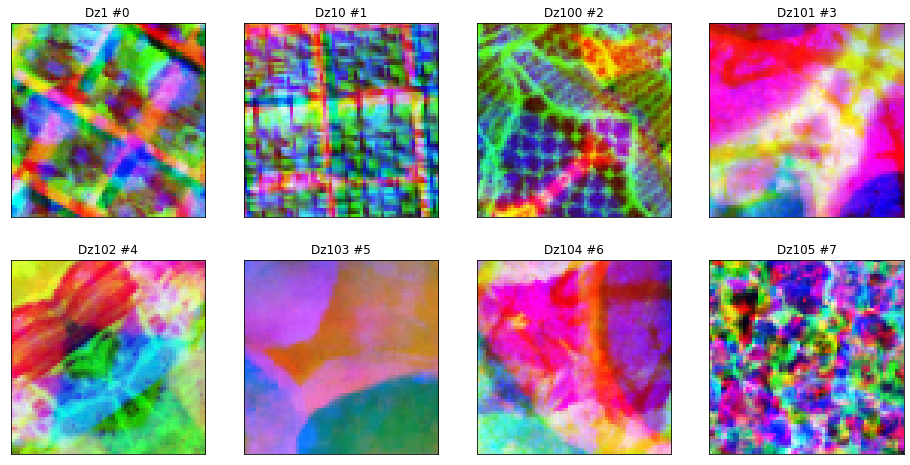

In [225]:
plot_augmented_samples()

In [77]:

def plot_augmented_samples_for_same_image(nrows = 2, ncols = 4, subfig_width = 4, subfig_height = 4):
    
    X,y = load_mbt_dataset()
    
    X_train, y_train, X_test, y_test = split_mbt_dataset(X, y)
    
    img_augmenter = construct_augmentation_model()
    
    
    figsize = (ncols * subfig_width, nrows * subfig_height) 
    
    fig, axes = plt.subplots(nrows = nrows,
                             ncols = ncols,
                             figsize = figsize)
    
    """ plt.subplots_adjust(left = 0.02,
                    right = 0.97,
                    bottom = 0.05,
                    hspace = 0.1,
                    wspace = 0.1,
                    top = 0.95)
    """

    axes_flat = axes.flat
    
    indices = list(range(len(y_train)))
    idx = np.random.choice(indices)
    candidate_image = X_train[idx, :, :, :]
    
    
    
    for row in range(nrows):
        for col in range(ncols):
            
            plotid = row * ncols + col
            
            Xi = candidate_image.copy()
            Xi = np.expand_dims(Xi, axis = 0)
            Xi = img_augmenter(Xi)
            #Xi = np.array(Xi * 255, dtype = np.uint8)
            img = Xi[0, :, :, :]
    
            #img = X_train[imgid, :, :, :]
            #img = np.array(img, dtype = np.uint8) #print("img.shape", img.shape)
            
            label = y_train[idx]
            
            ax = axes_flat[row * ncols + col] 
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(img, vmin = 0, vmax = 1.0) 
            ax.title.set_text(f"{label} #{plotid}")

    plt.show()
    plt.close()


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.

Splitting dataset into training and testing dataset ...
size of training dataset : 154
size of testing dataset : 154
training dataset shape: (154, 256, 512, 3)
testing dataset shape: (154, 256, 512, 3)

Building augmentation model ...
input_size = (256, 512, 3)
output_size = (64, 64, 3)


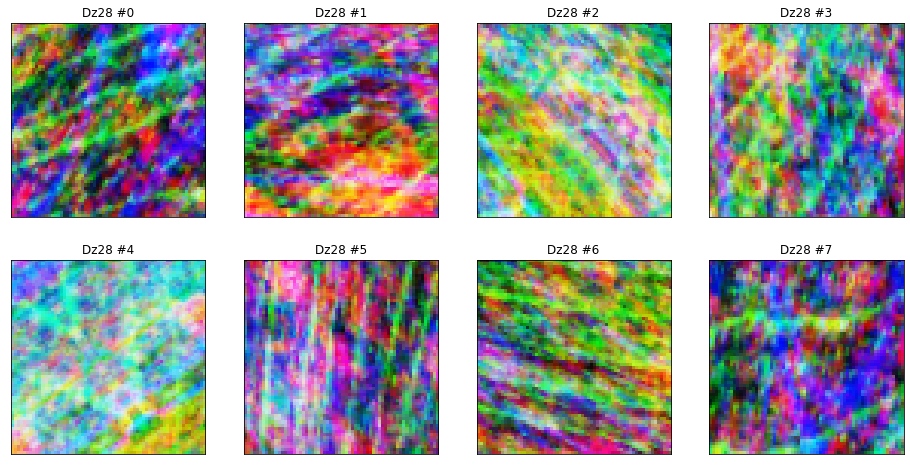

In [227]:
plot_augmented_samples_for_same_image()

# Plotting feature maps of base encoder

In [78]:
def plot_feature_maps(nrows = 2, ncols = 4, subfig_width = 4, subfig_height = 4):
    
    X,y = load_mbt_dataset()
    
    X = X.astype('float32')

    X_train, y_train, X_test, y_test = split_mbt_dataset(X, y)
    
    img_augmenter = construct_augmentation_model()
    
    base_encoder = construct_base_encoder(input_size = INPUT_SHAPE, 
                                      output_layer_name = "conv3_block4_out")

    
    
    layer = img_augmenter.layers[0]
    inputs_shape = layer.output.shape[1:4]
    
    inputs = keras.Input(shape = inputs_shape)
    x = img_augmenter(inputs)
    outputs = base_encoder(x)
    #outputs = keras.layers.GlobalAveragePooling2D()(x)
    
    model = keras.Model(inputs = inputs, outputs = outputs)
    
    
    print("model outputs shape: ", model.layers[-1].output.shape)
    
    figsize = (ncols * subfig_width, nrows * subfig_height) 
    
    fig, axes = plt.subplots(nrows = nrows,
                             ncols = ncols,
                             figsize = figsize)
    
    """ plt.subplots_adjust(left = 0.02,
                    right = 0.97,
                    bottom = 0.05,
                    hspace = 0.1,
                    wspace = 0.1,
                    top = 0.95)
    """

    axes_flat = axes.flat
    
    
    for row in range(nrows):
        for col in range(ncols):
            
            imgid = row * ncols + col
            
            Xi = X_train[imgid, :, :, :]
            Xi = np.expand_dims(Xi, axis = 0)
            
            featuremaps = model.predict(Xi)
            
            print(featuremaps.shape)
            
            #Xi = np.array(Xi, dtype = np.uint8)
            
            #img = Xi[0, :, :, :]
    
            #img = X_train[imgid, :, :, :]
            #img = np.array(img, dtype = np.uint8) #print("img.shape", img.shape)
            
            #label = y_train[imgid]
            
            #ax = axes_flat[row * ncols + col] 
            #ax.set_xticks([])
            #ax.set_yticks([])
            #ax.imshow(img) 
            #ax.title.set_text(f"{label} #{imgid}")

    plt.show()
    plt.close()
    



In [229]:
# plot_feature_maps()

# Constructing a pair of transformation functions

In [66]:
def build_dual_img_augmenters(rand_seed = 21):
    
    input_size = (*IMAGE_SIZE, N_IMAGE_CHANNELS)
    output_size = INPUT_SHAPE
    
    #print()
    #print("Building dual image augmenters ...")
    #print(f"input_size = {input_size}")
        
    img_augmenter_1 = construct_augmentation_model( input_size = input_size, 
                                                    output_size = output_size,
                                                    rand_seed = rand_seed)
    
    img_augmenter_2 = construct_augmentation_model( input_size = input_size, 
                                                    output_size = output_size,
                                                    rand_seed = rand_seed)
    
    return img_augmenter_1, img_augmenter_2

In [79]:
img_augmenter_1, img_augmenter_2 = build_dual_img_augmenters()


Building augmentation model ...
input_size = (256, 512, 3)
output_size = (64, 64, 3)

Building augmentation model ...
input_size = (256, 512, 3)
output_size = (64, 64, 3)


# Constructing embedding model as building block

In [105]:
#https://github.com/mwdhont/SimCLRv1-keras-tensorflow/blob/master/SimCLR.py
from tensorflow.keras.callbacks import (ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,)

def build_embedding_model(*, 
                          projhead_beta = 0.005,
                          output_layer_name = "conv3_block4_out"):
          
        
        return None, None, construct_base_encoder_2(img_size = INPUT_SHAPE, 
                                                    embedding_dim = OUTPUT_DIM)
        
        #img_augmenter = construct_augmentation_model(input_size = (*IMAGE_SIZE, N_IMAGE_CHANNELS), 
        #                                                  output_size = INPUT_SHAPE)
        
        
        base_encoder = construct_base_encoder(input_size = INPUT_SHAPE, 
                                                   output_layer_name = output_layer_name,
                                                   )
        
        base_encoder.trainable = False
        
        base_encoder_outputs_dim = base_encoder.layers[-1].output.shape.as_list()[1:]
        
        proj_head = construct_projhead_model(  input_size = base_encoder_outputs_dim,
                                                    output_size = OUTPUT_DIM,
                                                    beta = projhead_beta)
        
        
        #layer = img_augmenter.layers[0]
        #inputs_shape = layer.output.shape[1:4]
        
        
        #img_augmenter.summary()
        #base_encoder.summary()
        #proj_head.summary()
        
        inputs_shape = INPUT_SHAPE
        #inputs_shape = (*IMAGE_SIZE, N_IMAGE_CHANNELS)
        inputs = keras.Input(shape = inputs_shape, name = "inputs")
        
        #x = img_augmenter(inputs)
        x = base_encoder(inputs)
        
        outputs = proj_head(x)
        
        embedding_model = keras.Model(inputs = inputs, outputs = outputs, name = "block_model")
        
        return base_encoder, proj_head, embedding_model


In [106]:
base_encoder, proj_head, embedding_model = build_embedding_model()

In [107]:
X,y = load_mbt_dataset()
    
X_train, y_train, X_test, y_test = split_mbt_dataset(X, y)


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.

Splitting dataset into training and testing dataset ...
size of training dataset : 154
size of testing dataset : 154
training dataset shape: (154, 256, 512, 3)
testing dataset shape: (154, 256, 512, 3)


In [108]:
embedding_inputs = img_augmenter_1(np.expand_dims(X_train[0], axis = 0))
y = embedding_model(embedding_inputs)
y.shape

TensorShape([1, 10])

# Downstream classifier k-NN

In [119]:
from sklearn.neighbors import KNeighborsClassifier

def knn_accuracy(X_train, y_train, X_test, y_test):
    
    knn = KNeighborsClassifier(n_neighbors = 3)
    
    knn.fit(X_train, y_train)
    
    accuracy_train = knn.score(X_train, y_train)
    accuracy_test = knn.score(X_test, y_test)
    

    return accuracy_train, accuracy_test

# Prediction accuracy on raw inputs

In [120]:
X,y = load_mbt_dataset()
    
X_train, y_train, X_test, y_test = split_mbt_dataset(X, y)


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.

Splitting dataset into training and testing dataset ...
size of training dataset : 154
size of testing dataset : 154
training dataset shape: (154, 256, 512, 3)
testing dataset shape: (154, 256, 512, 3)


In [121]:
#print(X_train.shape)
X_train_ = X_train.reshape(X_train.shape[0], -1)
X_test_ = X_test.reshape(X_test.shape[0], -1)
print(X_train_.shape)
print(X_test_.shape)

(154, 393216)
(154, 393216)


In [122]:
accuracy_train, accuracy_test = knn_accuracy(X_train_, y_train, X_test_, y_test)

print("accuracy_train = ", accuracy_train)
print("accuracy_test = ", accuracy_test)

accuracy_train =  0.3181818181818182
accuracy_test =  0.07142857142857142


# Prediction accuracy on base encoder

In [261]:
encoder = construct_base_encoder(input_size = INPUT_SHAPE, 
                                 output_layer_name = "conv3_block4_out",
                                )

# train dataset
X_train_ = img_augmenter_1(X_train)

X_train_ = encoder.predict(X_train_)

print()
print("X_train_.shape = ", X_train_.shape)

num_of_samples = X_train_.shape[0]

print("num_of_samples = ", num_of_samples)

X_train_ = X_train_.reshape(num_of_samples, -1)

print("X_train_.shape = ", X_train_.shape)

# test dataset
X_test_ = img_augmenter_1(X_test)

X_test_ = encoder.predict(X_test_)

print()
print("X_test_.shape = ", X_test_.shape)

num_of_samples = X_test_.shape[0]

print("num_of_samples = ", num_of_samples)

X_test_ = X_test_.reshape(num_of_samples, -1)

print("X_test_.shape = ", X_test_.shape)



Building base encoder ...
input_size = (64, 64, 3)
output_layer_name = conv3_block4_out
output_size = (8, 8, 512)
orig_num_of_layers = 176
new_num_of_layers = 81 ( 0.46)

X_train_.shape =  (154, 8, 8, 512)
num_of_samples =  154
X_train_.shape =  (154, 32768)

X_test_.shape =  (154, 8, 8, 512)
num_of_samples =  154
X_test_.shape =  (154, 32768)


In [237]:
accuracy_train, accuracy_test = knn_accuracy(X_train_, y_train, X_test_, y_test)

print("accuracy_train = ", accuracy_train)
print("accuracy_test = ", accuracy_test)

accuracy_train =  1.0
accuracy_test =  0.01948051948051948


# Contrastive learning with Triplet

# Triplet data generator

In [85]:
def generate_triplets(*, 
                      batch_size = BATCH_SIZE,
                      output_shape = INPUT_SHAPE,
                      img_augmenter,
                      X, y):
    
    """ Generate an un-ending stream of triplets for training or test.
    """
        
    #X = X.astype('float32')
    
    #img_size = X[0].shape
    
    indices = list(range(len(X)))
    
    while True:
        #A = np.zeros((batch_size, *output_shape), dtype="float32")
        #P = np.zeros((batch_size, *output_shape), dtype="float32")
        #N = np.zeros((batch_size, *output_shape), dtype="float32")
        
        A = []
        P = []
        N = []
        
        for i in range(batch_size):
            
            idx = np.random.choice(indices, 2, replace = False)
                
            x1, x2 = X[idx]
            
            x1 = x1.copy()
            x2 = x2.copy()
            
            x1 = np.expand_dims(x1, axis = 0)
            x2 = np.expand_dims(x2, axis = 0)
            
            a = img_augmenter(x1)
            p = img_augmenter(x1)
            n = img_augmenter(x2)

            A.append(a[0])
            P.append(p[0])
            N.append(n[0])
            
            #A[i] = a[0]
            #P[i] = p[0]
            #N[i] = n[0]
            
        yield [np.array(A), np.array(P), np.array(N)]
        

In [110]:
#print(INPUT_SHAPE)

X,y = load_mbt_dataset()
#X = X.astype('float32')

X_train, y_train, X_test, y_test = split_mbt_dataset(X, y, split = 0.5)



for x in generate_triplets(img_augmenter = img_augmenter_1,
                           X = X_train, 
                           y = y_train):
    a, p, n = x
    
    print()
    print(a.shape)
    print(p.shape)
    print(n.shape)
    
    print()
    print("|a-p| = ", tf.math.reduce_sum((a - p)**2).numpy())
    print("|a-n| = ", tf.math.reduce_sum((a - n)**2).numpy())
    
    break


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.

Splitting dataset into training and testing dataset ...
size of training dataset : 154
size of testing dataset : 154
training dataset shape: (154, 256, 512, 3)
testing dataset shape: (154, 256, 512, 3)

(16, 64, 64, 3)
(16, 64, 64, 3)
(16, 64, 64, 3)

|a-p| =  28345.162
|a-n| =  29688.326


In [240]:
#X_train[0]

In [241]:
#img_augmenter_1(X_train[0])

## Triplet loss function

In [87]:
# This code is from James McDermott's lecture in CT5133 Deep learning of NUIG 2020-2021
import keras.backend as K

class TripletLossLayer(keras.layers.Layer):
    def __init__(self, alpha=0.2):
        super(TripletLossLayer, self).__init__()
        self.alpha = alpha

    def call(self, inputs):
        # a batch of (anchor, positive, negative), *after* encoding
        a, p, n = inputs

        #print("a.shape=", a.shape)
        #print("p.shape=", p.shape)
        #print("n.shape=", n.shape)
        
        #print("TripletLossLayer ", a.shape)
        
        # Euclidean distance in the embedding space. axis=-1 means sum
        # over the dimensions of the embedding, but don't sum over the
        # items of the batch. keepdims=True means the result eg d_ap
        # is of shape (batch_size, 1), not just (batch_size,).
        d_ap = K.sqrt(K.sum(K.square(a - p), axis=-1, keepdims=True))
        d_an = K.sqrt(K.sum(K.square(a - n), axis=-1, keepdims=True))

        # exactly as in the formula
        loss = K.maximum(0.0, d_ap - d_an + self.alpha)
        # loss is a tensor of shape (batch_size, 1), one loss per
        # triplet in the batch. This is the "expected" shape for Keras
        # losses, even though just a scalar, or just (batch_size,)
        # would also work.

        #print("loss=", loss)
        
        # this is the crucial line, allowing our calculation to be
        # used in the model
        self.add_loss(loss)
        # we won't use the return value, but let's return *something*
        return a

In [88]:
a = np.expand_dims(np.random.rand(5), axis = 0)
p = np.expand_dims(np.random.rand(5), axis = 0)
n = np.expand_dims(np.random.rand(5), axis = 0)


TripletLossLayer(alpha = 0.5)([a, p, n])


<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.38925916, 0.4891702 , 0.7909721 , 0.99158067, 0.36520308]],
      dtype=float32)>

## Constructing triplet-loss based model

In [186]:
embedding_dim = OUTPUT_DIM
img_size = (64, 64, 3)

def embedding_model_2():
    """A small convolutional model. Its input is an image and output is an
    embedding, ie a vector. We don't compile or add a loss since this
    model will become a component in the complete model below."""
    model = keras.Sequential()
    model.add(keras.layers.Convolution2D(32, (3, 3), activation='relu',
                            input_shape=img_size))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Convolution2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Convolution2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.GlobalMaxPooling2D())
    model.add(keras.layers.Dropout(0.1))
    # model.add(Flatten())
    model.add(keras.layers.Dense(32, activation='relu'))
    # tanh => output is in [-1, 1]^embedding_dim
    model.add(keras.layers.Dense(embedding_dim, activation='tanh'))
    return model

#embedding_model = embedding_model()

#embedding_model.summary()

In [111]:
# This code is from James McDermott's lecture in CT5133 Deep learning of NUIG 2020-2021
# I modified the original code a bit.

def get_contrastive_model_triplet(*, 
                                  alpha = 0.5, 
                                  learning_rate = 0.001,
                                  embedding_model):
    
    print()
    print("Building contrastive model with triplet loss ...")
    
    #inputs_shape = embedding_model.layers[0].output.shape.as_list()[1:]
    inputs_shape = INPUT_SHAPE
    print("inputs_shape = ", inputs_shape)
    
    input_a = keras.Input(shape = inputs_shape)
    input_p = keras.Input(shape = inputs_shape)
    input_n = keras.Input(shape = inputs_shape)
    
    #print(input_a)
    
    
    # call the encoder three times to get embeddings
    a = embedding_model(input_a)
    p = embedding_model(input_p)
    n = embedding_model(input_n)

    # the return value from our TripletLossLayer is irrelevant
    # (NB return value is not the loss)
    dummy = TripletLossLayer(alpha = alpha)([a, p, n]) 
    model = keras.Model(inputs=[input_a, input_p, input_n], outputs=dummy)
    
    # compile with no loss, because TripletLossLayer has added the loss
    model.compile(optimizer=keras.optimizers.Adam(learning_rate), run_eagerly = False) 
    
    return model

In [112]:
base_encoder, proj_head, embedding_model = build_embedding_model(
            output_layer_name = "conv3_block4_out"
        )

triplet_model = get_contrastive_model_triplet(embedding_model = embedding_model)


Building contrastive model with triplet loss ...
inputs_shape =  (64, 64, 3)


In [113]:
#triplet_model.summary()
embedding_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
global_max_pooling2d_13 (Glo (None, 32)                0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)              

## Training

In [114]:
X, y = load_mbt_dataset()
    
X_train, y_train, X_test, y_test = split_mbt_dataset(X, y, split = 0.5)
    
train_generator = generate_triplets(img_augmenter = img_augmenter_1,
                                    batch_size = 32,
                                    X = X_train, 
                                    y = y_train)


Loading dataset from path: mbt ...
image size:  (512, 512)
Total 154 images are loaded.

Splitting dataset into training and testing dataset ...
size of training dataset : 154
size of testing dataset : 154
training dataset shape: (154, 256, 512, 3)
testing dataset shape: (154, 256, 512, 3)


In [115]:
triplet_history = triplet_model.fit(
                  train_generator, 
                  epochs = 50,
                  steps_per_epoch=10,
                  #validation_steps=1,
                  verbose=1
                 )

Epoch 1/100
10/10 [==============================] - 15s 2s/step - loss: 0.4905
Epoch 2/100
10/10 [==============================] - 16s 2s/step - loss: 0.4785
Epoch 3/100
10/10 [==============================] - 16s 2s/step - loss: 0.4403
Epoch 4/100
10/10 [==============================] - 17s 2s/step - loss: 0.3630
Epoch 5/100
10/10 [==============================] - 17s 2s/step - loss: 0.3018
Epoch 6/100
10/10 [==============================] - 17s 2s/step - loss: 0.2912
Epoch 7/100
10/10 [==============================] - 17s 2s/step - loss: 0.2659
Epoch 8/100
10/10 [==============================] - 17s 2s/step - loss: 0.2600
Epoch 9/100
10/10 [==============================] - 17s 2s/step - loss: 0.2812
Epoch 10/100
10/10 [==============================] - 17s 2s/step - loss: 0.2312
Epoch 11/100
10/10 [==============================] - 16s 2s/step - loss: 0.2241
Epoch 12/100
10/10 [==============================] - 16s 2s/step - loss: 0.2465
Epoch 13/100
10/10 [=================

In [114]:
embedding_model.save("models/triplet_embedding_model.saved_model")

/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: models/embedding_model.saved_model/assets


# Triplet loss history

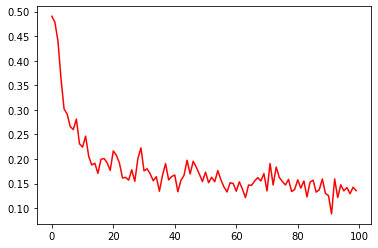

In [116]:
#print(triplet_history.history)
triplet_loss_hist = triplet_history.history["loss"]
plt.plot(triplet_loss_hist, color = "red")
plt.show()

# Prediction accuracy on triplet-trained embedding

In [123]:
# train dataset
X_train_ = img_augmenter_1(X_train)

X_train_ = embedding_model.predict(X_train_)

print()
print("X_train_.shape = ", X_train_.shape)

num_of_samples = X_train_.shape[0]

print("num_of_samples = ", num_of_samples)

X_train_ = X_train_.reshape(num_of_samples, -1)

print("X_train_.shape = ", X_train_.shape)

# test dataset
X_test_ = img_augmenter_1(X_test)

X_test_ = embedding_model.predict(X_test_)

print()
print("X_test_.shape = ", X_test_.shape)

num_of_samples = X_test_.shape[0]

print("num_of_samples = ", num_of_samples)

X_test_ = X_test_.reshape(num_of_samples, -1)

print("X_test_.shape = ", X_test_.shape)


X_train_.shape =  (154, 10)
num_of_samples =  154
X_train_.shape =  (154, 10)

X_test_.shape =  (154, 10)
num_of_samples =  154
X_test_.shape =  (154, 10)


In [124]:
accuracy_train, accuracy_test = knn_accuracy(X_train_, y_train, X_test_, y_test)

print("accuracy_train = ", accuracy_train)
print("accuracy_test = ", accuracy_test)

accuracy_train =  0.3246753246753247
accuracy_test =  0.03896103896103896


## Constructing contrastive model

## Customised info-NCE loss function

In [765]:
import tensorflow as tf
import keras.backend as K

# We refer to:
# https://github.com/mwdhont/SimCLRv1-keras-tensorflow/blob/master/SoftmaxCosineSim.py

class CustomisedLossLayer(keras.layers.Layer):
    def __init__(self, 
                 *,
                 input_size,
                 batch_size = BATCH_SIZE, 
                 temperature = 0.01,
                 **kwargs):
        
        self.batch_size = batch_size
        self.input_size = input_size
        self.temperature = temperature
        
        print(f"batch_size = {batch_size} input_size = {input_size} temperature = {temperature}")
    
        super(CustomisedLossLayer, self).__init__()
        
    def __call__(self, inputs):
        
        z1 = []
        z2 = []

        for i in range(self.batch_size):            
            # for a input which is expended in batch mode, the data is in the format:
            # [B1, B2, B3, .., Bn] where Bi denotes the ith data.
            
            z1.append(tf.math.l2_normalize(inputs[i][0], -1))
            z2.append(tf.math.l2_normalize(inputs[self.batch_size + i][0], -1))
          
        #z1 = np.array(z1, dtype = np.float64)
        #z2 = np.array(z2, dtype = np.float64)
        
        # Gather hidden1/hidden2 across replicas and create local labels.
        z1_large = z1
        z2_large = z2

        LARGE_NUM = 1e9
        #masks = tf.one_hot(tf.range(self.batch_size), self.batch_size, dtype=np.float64) 
        masks = tf.one_hot(tf.range(self.batch_size), self.batch_size) 


        
      
        # Products of vectors of same side of network (z_i), count as negative examples
        # Values on the diagonal are put equal to a very small value
        # -> exclude product between 2 identical values, no added value
        
        
        logits_aa = tf.matmul(z1, z1_large, transpose_b=True) / self.temperature
        logits_aa = logits_aa - masks * LARGE_NUM

        
        logits_bb = tf.matmul(z2, z2_large, transpose_b=True) / self.temperature
        logits_bb = logits_bb - masks * LARGE_NUM

        # Similarity between two transformation sides of the network (z_i and z_j)
        # -> diagonal should be as close as possible to 1
        logits_ab = tf.matmul(z1, z2_large, transpose_b=True) / self.temperature
        logits_ba = tf.matmul(z2, z1_large, transpose_b=True) / self.temperature

        
        part1 = keras.activations.softmax(tf.concat([logits_ab, logits_aa], 1))
        part2 = keras.activations.softmax(tf.concat([logits_ba, logits_bb], 1))
        
        y = tf.concat([part1, part2], 1)
        
        loss = tf.math.reduce_mean(y)
        #loss = K.sum(y) / (2 * self.batch_size)
        #loss = 1
        #loss = K.mean(y, axis=-1)
        #loss = K.sum(y, keepdims=True) 
        #loss = K.maximum(0.0, 1)
        
       
        # adding loss
        #self.add_loss(lambda :loss)
        self.add_loss(loss)

        
        return None
    

In [ ]:
layer = CustomisedLossLayer(input_size=5)

inputs = [np.expand_dims(np.random.rand(5), axis = 0) for i in range(2*BATCH_SIZE)]

layer(inputs)

#np.expand_dims(["A", "B"], axis = 0)

In [767]:
def get_contrastive_model_infonce_loss(*, 
                          temp = 0.01,              #temparature
                          batch_size = BATCH_SIZE,       #batch size
                          learning_rate = 1e-4,  #learning rate
                         ):
        
        print("building contrastive model ...")
      
        inputs_shape = complete_model.layers[0].output.shape.as_list()[1:]
        
        print("get_contrastive_model: inputs_shape = ", inputs_shape)
        
        I = []   # 2 x batch size
        X = []   # f(x)
        O = None
        
        print("batch_size = ", batch_size)
        
        for idx in range(2 * batch_size):
            I.append(keras.Input(shape = inputs_shape))
            X.append(complete_model(I[idx]))

        #O = SoftmaxCosineSim(self.batch_size, OUTPUT_DIM)(X)
        
        inputs_size = complete_model.layers[-1].output.shape.as_list()[1:]
        print("X inputs_size = ", inputs_size)
      
        O = CustomisedInfoNCELossLayer(input_size = OUTPUT_DIM, batch_size = batch_size)(X)

        print("X[0].shape = ", X[0].shape)
        print("I.len = ", len(I))
        #print("O.shape = ", O.shape)
        
        model = keras.Model(inputs = I, outputs = O, name = "contrastive_model")
        model.compile(optimizer = keras.optimizers.Adam(learning_rate, amsgrad = True))
        
        #print("---")
        #model.summary()
        
        return model

In [768]:
infonce_model = get_contrastive_model_infonce_loss()

building contrastive model ...
get_contrastive_model: inputs_shape =  [64, 64, 3]
batch_size =  8
X inputs_size =  [30]
batch_size = 8 input_size = 30 temperature = 0.01
KerasTensor(type_spec=TensorSpec(shape=(), dtype=tf.float32, name=None), name='tf.math.truediv_40/truediv:0', description="created by layer 'tf.math.truediv_40'")
X[0].shape =  (None, 30)
I.len =  16


In [753]:
inputs = [np.expand_dims(np.random.rand(*INPUT_SHAPE), axis = 0) for i in range(2*BATCH_SIZE)]
outputs = infonce_model.predict(inputs)
outputs.shape

(8, 32)

In [769]:
infonce_model.fit(
            inputs,
            epochs = 1,
            verbose = 1,
            #validation_data = data_val,
            #callbacks=[checkpoint, earlyStopping, reduce_lr],
        )

1/1 [==============================] - 7s 7s/step - loss: 9.5852


# Visualising embedding with t-SNE

In [372]:
#import matplotlib.pyplot as plt
#import numpy as np
import random

from sklearn.manifold import TSNE

def visualise_embedding_tsne(*, features, labels, save_name = None, save_fig = False):
    
    colours = ["green", "gray", "brown", "blue", "red"]
    
    class_labels = list(set(labels))
    
    tsne = TSNE(n_jobs = 8, random_state = 42)
    tsne_embedding = tsne.fit_transform(features)
    
    print(tsne_embedding.shape)
    
    fig = plt.figure(figsize=(7, 7))
    lr = 150
    p = 50
    index = 0
    
    for i, Xi in enumerate(tsne_embedding):
        print(Xi.shape)
        colour = colours[i % 5]
        plt.scatter(Xi[0], Xi[1], c = colour)
    
    
    fig.legend(
        bbox_to_anchor=(0.075, 0.061),
        loc = "lower left",
        ncol = 1,
        labels = class_labels,
    )
    
    if save_fig and save_name is not None:
        plt.savefig(
            "figures/" + save_name + ".svg", 
            bbox_inches="tight",)
    
    plt.show()
    plt.close()

In [374]:
#features = np.random.rand(8, 30)
#print(features.shape)
#labels = ["A", "B", "C", "D", "A", "B", "C", "D"]
#visualise_embedding_tsne(features = features, labels = labels)

# Training the projection head

# Fine-tuning

# Temperatures

# Batch sizes

# Varying layers

# Visualising original textures on t-SNE embedding

# Visualising textures with contrastive learning on t-SNE embedding

# Visualising textures with fine-tuned contrastive learning on t-SNE embedding